# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 652


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f'{url}appid={weather_api_key}&q={city}&units={units}'
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | lebu
Processing Record 2 of Set 1 | mys shmidta
City not found. Skipping...
Processing Record 3 of Set 1 | broken hill
Processing Record 4 of Set 1 | georgetown
Processing Record 5 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 6 of Set 1 | rikitea
Processing Record 7 of Set 1 | punta arenas
Processing Record 8 of Set 1 | peniche
Processing Record 9 of Set 1 | muzhi
Processing Record 10 of Set 1 | tasbuget
City not found. Skipping...
Processing Record 11 of Set 1 | vaini
Processing Record 12 of Set 1 | san patricio
Processing Record 13 of Set 1 | butaritari
Processing Record 14 of Set 1 | turukhansk
Processing Record 15 of Set 1 | bengkulu
Processing Record 16 of Set 1 | okmulgee
Processing Record 17 of Set 1 | pevek
Processing Record 18 of Set 1 | narsaq
Processing Record 19 of Set 1 | ushuaia
Processing Record 20 of Set 1 | bilma
Processing Record 21 of Set 1 | kununurra
Pro

In [11]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          598
Lat           598
Lng           598
Max Temp      598
Humidity      598
Cloudiness    598
Wind Speed    598
Country       598
Date          598
dtype: int64

In [12]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,lebu,-37.6167,-73.6500,16.34,93,66,6.62,CL,1675047486
1,broken hill,-31.9500,141.4333,26.77,47,50,6.27,AU,1675047803
2,georgetown,5.4112,100.3354,28.96,70,20,3.09,MY,1675047767
3,rikitea,-23.1203,-134.9692,26.25,69,22,3.99,PF,1675047810
4,punta arenas,-53.1500,-70.9167,9.06,81,75,5.14,CL,1675047811


In [13]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [14]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,lebu,-37.6167,-73.6500,16.34,93,66,6.62,CL,1675047486
1,broken hill,-31.9500,141.4333,26.77,47,50,6.27,AU,1675047803
2,georgetown,5.4112,100.3354,28.96,70,20,3.09,MY,1675047767
3,rikitea,-23.1203,-134.9692,26.25,69,22,3.99,PF,1675047810
4,punta arenas,-53.1500,-70.9167,9.06,81,75,5.14,CL,1675047811


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

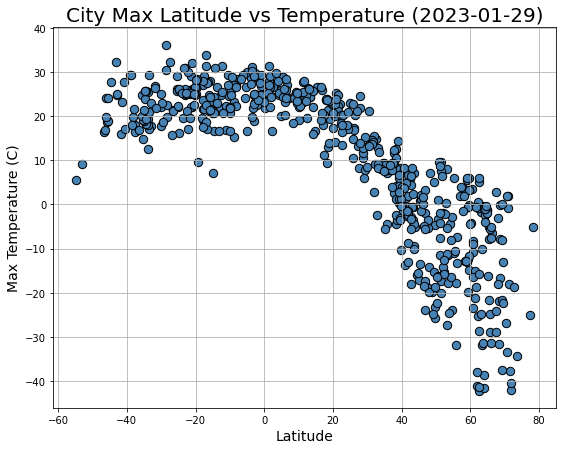

In [18]:
# Import date
from datetime import date 
d1 = date.today()

# Build scatter plot for latitude vs. temperature
city_data_df.plot("Lat", "Max Temp", kind='scatter', figsize=(9,7), s=70, c='steelblue', ec='black')

# Incorporate the other graph properties
plt.title(f'City Max Latitude vs Temperature ({d1})', fontsize=20)
plt.xlabel("Latitude", fontsize=14)
plt.ylabel("Max Temperature (C)", fontsize=14)
plt.grid()

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

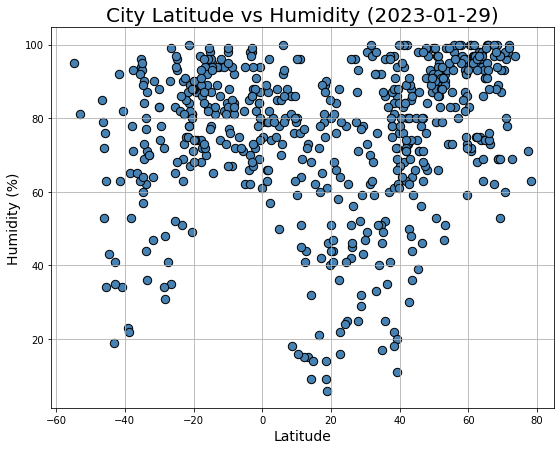

In [19]:
# Build the scatter plots for latitude vs. humidity
city_data_df.plot("Lat", "Humidity", kind='scatter', figsize=(9,7), s=70, c='steelblue', ec='black')

# Incorporate the other graph properties
plt.title(f'City Latitude vs Humidity ({d1})', fontsize=20)
plt.xlabel("Latitude", fontsize=14)
plt.ylabel("Humidity (%)", fontsize=14)
plt.grid()

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

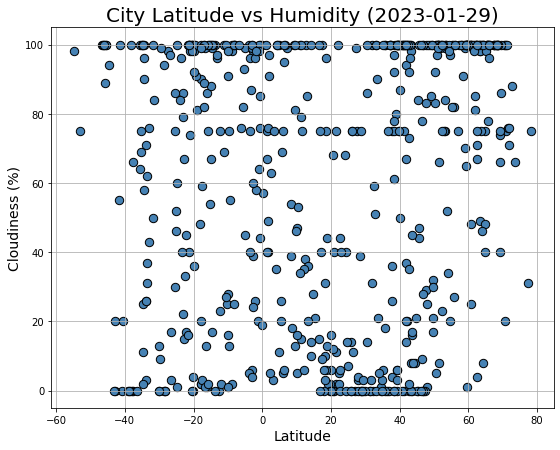

In [20]:
# Build the scatter plots for latitude vs. cloudiness
city_data_df.plot("Lat", "Cloudiness", kind='scatter', figsize=(9,7), s=70, c='steelblue', ec='black')

# Incorporate the other graph properties
plt.title(f'City Latitude vs Humidity ({d1})', fontsize=20)
plt.xlabel("Latitude", fontsize=14)
plt.ylabel("Cloudiness (%)", fontsize=14)
plt.grid()

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

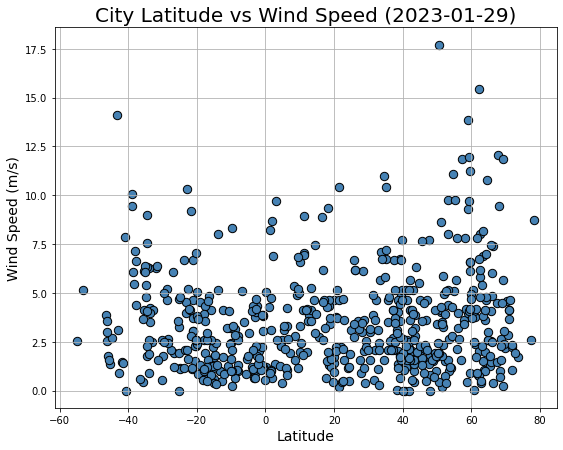

In [21]:
# Build the scatter plots for latitude vs. wind speed
city_data_df.plot("Lat", "Wind Speed", kind='scatter', figsize=(9,7), s=70, c='steelblue', ec='black')

# Incorporate the other graph properties
plt.title(f'City Latitude vs Wind Speed ({d1})', fontsize=20)
plt.xlabel("Latitude", fontsize=14)
plt.ylabel("Wind Speed (m/s)", fontsize=14)
plt.grid()

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [22]:
# Import 
import scipy.stats as st 

# Define a function to create Linear Regression plots
def func(x,y, x_label, y_label, title, text):
    # Define correlation, linear regression, and line 
    correlation = st.pearsonr(x,y)
    
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x,y)
    
    regress_values = x * slope + intercept 
    
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    # Create plot
    plt.figure(figsize=(9,7))
    markersize = 50 
    plt.scatter(x, y, markersize)
    plt.plot(x, regress_values, "r-")
    plt.annotate(line_eq, text, color="red", fontsize=20)
    
    plt.title(title, fontsize=20)
    plt.xlabel(x_label, fontsize=14)
    plt.ylabel(y_label, fontsize=14)
    
    plt.tight_layout()
    print(f'The r-squared is: {rvalue**2}')
    
    return plt.show()

In [23]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,georgetown,5.4112,100.3354,28.96,70,20,3.09,MY,1675047767
5,peniche,39.3558,-9.3811,6.92,72,6,4.84,PT,1675047816
6,muzhi,65.3667,64.6667,-21.65,100,100,1.27,RU,1675047818
8,san patricio,28.0170,-97.5169,21.92,93,3,3.01,US,1675047825
9,butaritari,3.0707,172.7902,27.21,80,3,9.69,KI,1675047825


In [24]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] <= 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,lebu,-37.6167,-73.6500,16.34,93,66,6.62,CL,1675047486
1,broken hill,-31.9500,141.4333,26.77,47,50,6.27,AU,1675047803
3,rikitea,-23.1203,-134.9692,26.25,69,22,3.99,PF,1675047810
4,punta arenas,-53.1500,-70.9167,9.06,81,75,5.14,CL,1675047811
7,vaini,-21.2000,-175.2000,29.09,84,40,4.63,TO,1675047824


###  Temperature vs. Latitude Linear Regression Plot

The r-squared is: 0.6990911949907419


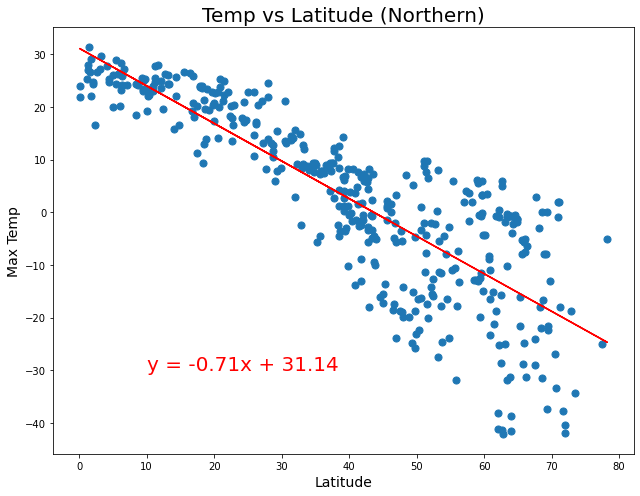

In [26]:
# Linear regression on Northern Hemisphere
line_eq = func(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"],"Latitude", "Max Temp", "Temp vs Latitude (Northern)", (10, -30))


The r-squared is: 0.09964324318041282


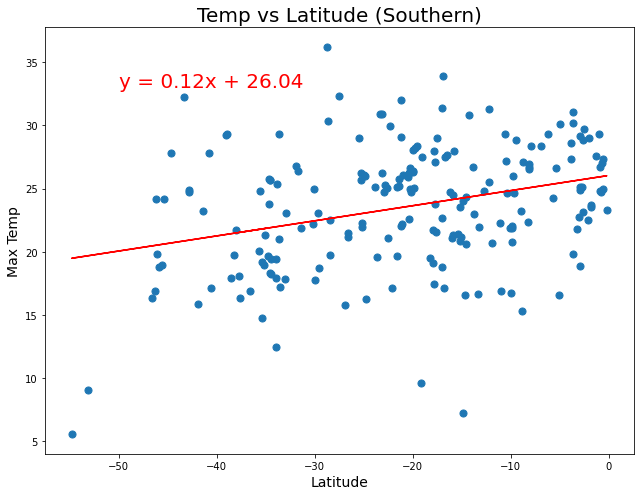

In [27]:
# Linear regression on Southern Hemisphere
line_eq = func(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"],"Latitude", "Max Temp", "Temp vs Latitude (Southern)", (-50, 33))


**Discussion about the linear relationship:** 

Based on the findings between temperature and latitude, it shows a strong correlation at 0.7 for the Northern Hemisphere and a very week correlation at 0.1 for the Southern Hemisphere. We can conclude that as the latitude increase upward and away from 0 (equator) the temperature will decrease.

### Humidity vs. Latitude Linear Regression Plot

The r-squared is: 0.15335082443422038


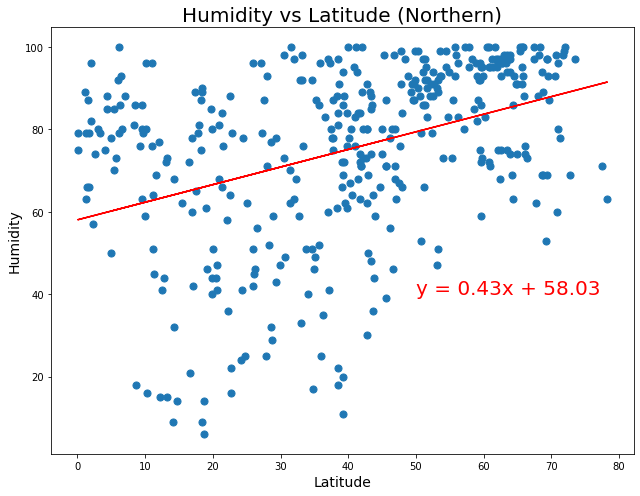

In [28]:
# Northern Hemisphere
line_eq = func(northern_hemi_df["Lat"], northern_hemi_df["Humidity"],"Latitude", "Humidity", "Humidity vs Latitude (Northern)", (50, 40))


The r-squared is: 0.13352366771557636


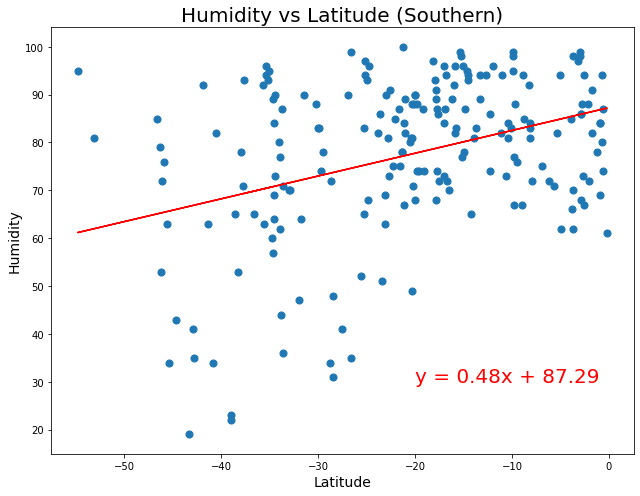

In [29]:
# Southern Hemisphere
line_eq = func(southern_hemi_df["Lat"], southern_hemi_df["Humidity"],"Latitude", "Humidity", "Humidity vs Latitude (Southern)", (-20, 30))


**Discussion about the linear relationship:** 

Based on the findings between humidity and latitude, both the Northern and Southern Hemisphere shows very weak correlation at 0.153 (North) and 0.133 (South). According to the plots we can see an increase in humidity as the latitude increase, but with a very weak correlation, we cannot make any further conclusions.

### Cloudiness vs. Latitude Linear Regression Plot

The r-squared is: 0.1381015441716228


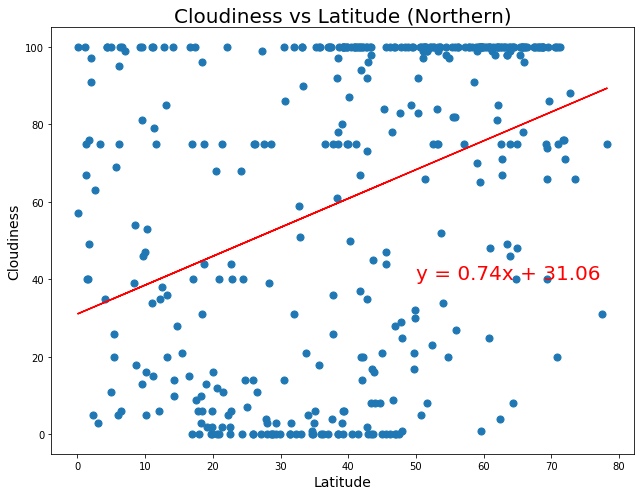

In [30]:
# Northern Hemisphere
line_eq = func(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"],"Latitude", "Cloudiness", "Cloudiness vs Latitude (Northern)", (50, 40))


The r-squared is: 0.008387152739013123


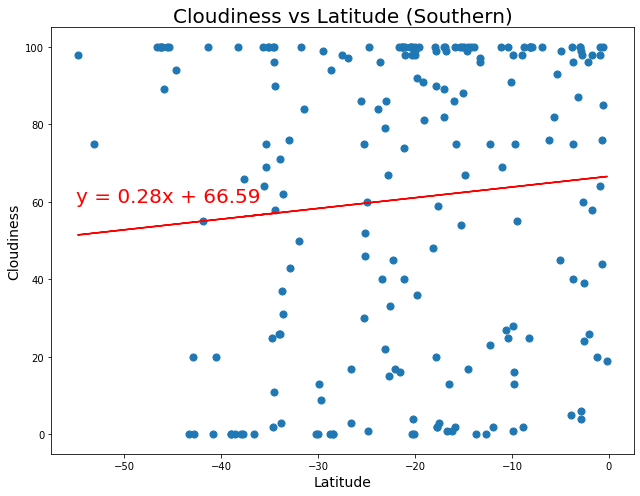

In [31]:
# Southern Hemisphere
line_eq = func(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"],"Latitude", "Cloudiness", "Cloudiness vs Latitude (Southern)", (-55, 60))


**Discussion about the linear relationship:** 

Based on the findings between cloudiness and latitude, both the Northern and Southern Hemisphere shows a very weak correlation at 0.138 (North) and 0.008 (South). According to the plots we can see an increase in cloudiness as the latitude increase, but with a very weak correlation, we cannot make any further conclusions.   

### Wind Speed vs. Latitude Linear Regression Plot

The r-squared is: 0.009053633958523623


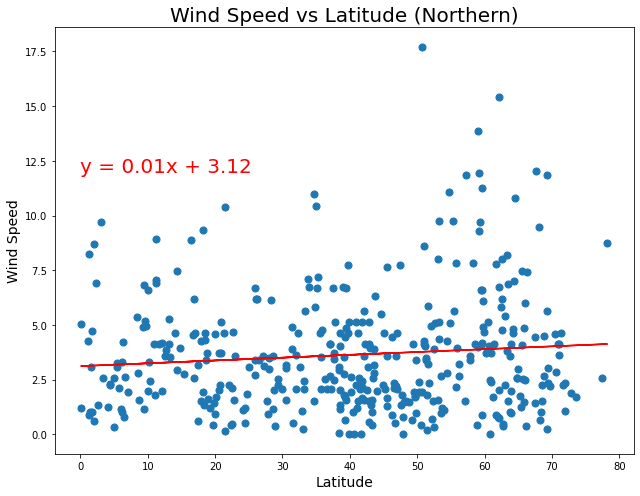

In [32]:
# Northern Hemisphere
line_eq = func(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"],"Latitude", "Wind Speed", "Wind Speed vs Latitude (Northern)", (0, 12))


The r-squared is: 0.09247658041599259


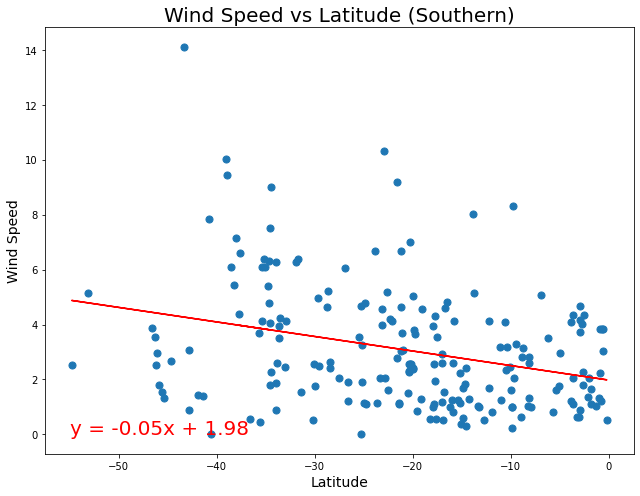

In [33]:
# Southern Hemisphere
line_eq = func(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"],"Latitude", "Wind Speed", "Wind Speed vs Latitude (Southern)", (-55, 0))


**Discussion about the linear relationship:** 

Based on the findings between wind speed and latitude, both the Northern and Southern Hemisphere shows a very weak correlation at 0.009 (North) and 0.092 (South). The Northern Hemisphere plot shows a slight increase in wind speed as the latitude increase while the Southern Hemisphere shows a decrease in wind speed as the latitude close in on the equator. Due to a very weak correlation, no conclusions can be drawn.